In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import KBinsDiscretizer 
from sklearn.compose import ColumnTransformer

In [13]:
data1=pd.read_csv(r"C:/Users/visha/OneDrive/Titanic-Dataset.csv",usecols=['Age','Fare','Survived'])

In [15]:
data1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [19]:
data1.shape

(891, 3)

In [21]:
data1.dropna(inplace=True)

In [29]:
data1.shape

(714, 3)

In [31]:
x=data1.iloc[:,1:]
y=data1.iloc[:,0]

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



In [45]:
y_train.head()

328    1
73     0
253    0
719    0
666    0
Name: Survived, dtype: int64

In [47]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred=clf.predict(x_test)

In [55]:
accuracy_score(y_test,y_pred)

0.6293706293706294

In [59]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6330790297339592

In [105]:
kbin_age=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')


In [107]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [109]:
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)

In [111]:
trf.named_transformers_['first'].n_bins_

array([15])

In [101]:
trf.named_transformers_['second'].bin_edges_


array([array([  0.    ,   7.8958,  13.    ,  26.    ,  51.4792, 512.3292])],
      dtype=object)

In [125]:
output=pd.DataFrame({
    'trf':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'trf1':x_train['Fare'],
    'Fare_trf':x_train_trf[:,1]
})

In [127]:
output

,trf,age_trf,trf1,Fare_trf
328,31.0,8.0,20.5250,8.0
73,26.0,6.0,14.4542,7.0
253,30.0,8.0,16.1000,7.0
719,33.0,9.0,7.7750,2.0
666,25.0,6.0,13.0000,6.0
...,...,...,...,...
92,46.0,12.0,61.1750,12.0
134,25.0,6.0,13.0000,6.0
337,41.0,11.0,134.5000,14.0
548,33.0,9.0,20.5250,8.0


In [131]:
output['age_label']=pd.cut(x=x_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_label']=pd.cut(x=x_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())


In [135]:
output.head()

,trf,age_trf,trf1,Fare_trf,age_label,fare_label
328,31.0,8.0,20.5250,8.0,"(30.0, 32.0]","(18.75, 26.0]"
73,26.0,6.0,14.4542,7.0,"(25.0, 28.0]","(13.0, 14.454]"
253,30.0,8.0,16.1000,7.0,"(28.0, 30.0]","(14.454, 18.75]"
719,33.0,9.0,7.7750,2.0,"(32.0, 35.0]","(7.25, 7.775]"
666,25.0,6.0,13.0000,6.0,"(23.0, 25.0]","(10.5, 13.0]"


In [137]:
clf1=DecisionTreeClassifier()
clf1.fit(x_train_trf,y_train)
y_pred2=clf1.predict(x_test_trf)


In [139]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [143]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6317292644757433

In [183]:
def descret(bins,strategy):
    kbin_age=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf=ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    x_trf=trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title('before')

    plt.subplot(122)
    plt.hist(x_trf[:,0],color='blue')
    plt.title("After")
    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title('before')

    plt.subplot(122)
    plt.hist(x_trf[:,1],color='blue')
    plt.title("After")
    plt.show()

0.624706572769953


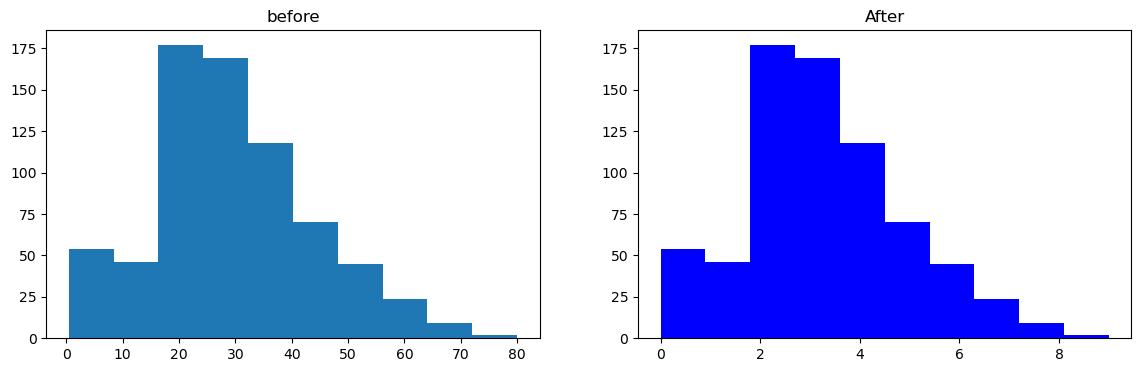

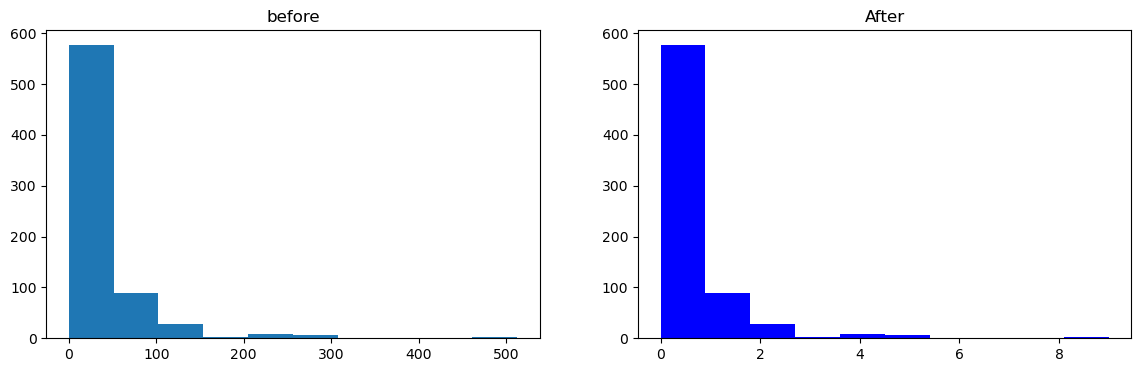

In [191]:
#strategy{‘uniform’, ‘quantile’, ‘kmeans’}, default=’quantile’
descret(10,'uniform')